In [7]:
# =============================================================
# 🎗️ BREAST CANCER CLASSIFICATION (BENIGN vs MALIGNANT)
# SDG 3: Good Health & Well-being
# =============================================================
# Problem:
# "Can we train an AI model that looks at tumour measurements
#  and predicts whether it is benign (safe) or malignant (cancer)?"
#
# Why this matters:
# Early detection saves lives. AI can support doctors by giving
# quick predictions based on patient test data.
# =============================================================

# 1) Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [8]:
# 2) Load dataset from sklearn (real medical dataset)
data = load_breast_cancer()

# Convert to DataFrame for easy viewing
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target   # 0 = malignant, 1 = benign
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


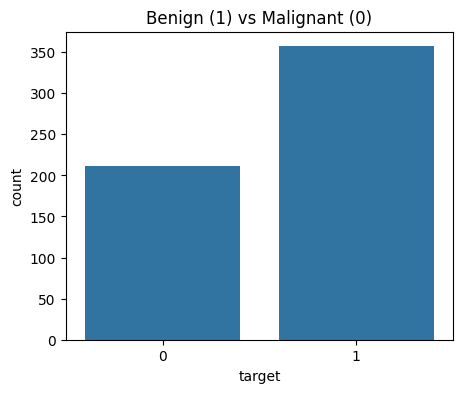

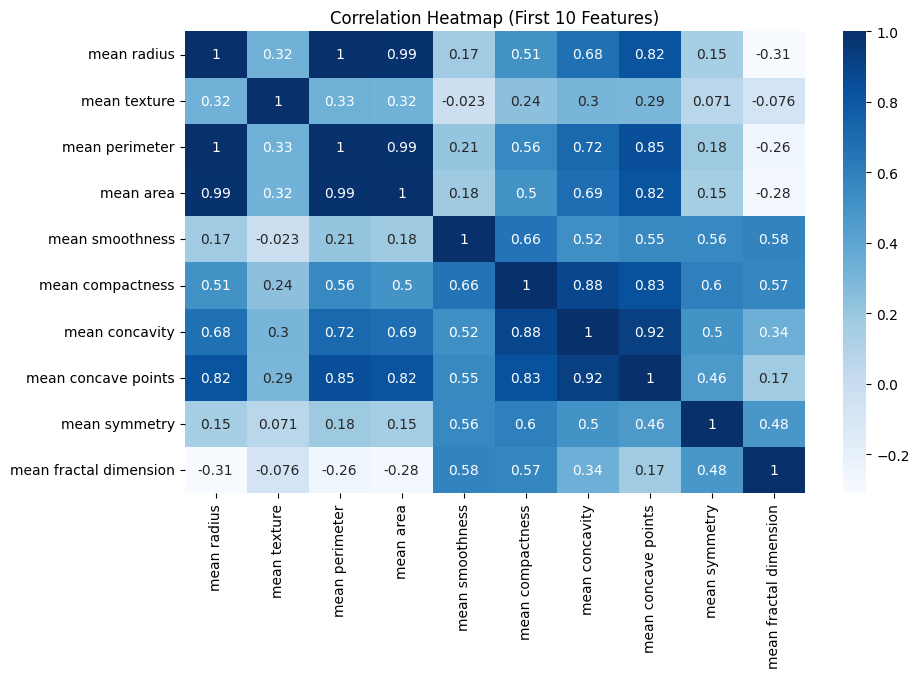

In [9]:
# Count benign vs malignant cases
plt.figure(figsize=(5,4))
sns.countplot(x=df["target"])
plt.title("Benign (1) vs Malignant (0)")
plt.show()

# Correlation heatmap (just top 10 features)
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:, :10].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap (First 10 Features)")
plt.show()


In [10]:
# 3) Create features and labels
X = df.drop("target", axis=1)
y = df["target"]

# 4) Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Scale features (important for medical data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6) Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [11]:
# 7) Make predictions
pred = model.predict(X_test_scaled)

# 8) Check accuracy
accuracy = accuracy_score(y_test, pred)
accuracy


0.9736842105263158

In [12]:
print(classification_report(y_test, pred, target_names=["Malignant", "Benign"]))


              precision    recall  f1-score   support

   Malignant       0.98      0.95      0.96        43
      Benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [13]:
# Example: Use the first test sample
sample = X_test_scaled[0].reshape(1, -1)

result = model.predict(sample)[0]

if result == 1:
    print("🟢 Prediction: BENIGN (Non-cancerous)")
else:
    print("🔴 Prediction: MALIGNANT (Cancerous)")


🟢 Prediction: BENIGN (Non-cancerous)
